In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train shape :", X_train.shape) # X_train shape : (60000, 28, 28)
print("y_train shape :", y_train.shape) # y_train shape : (60000,)
print("X_test shape :", X_test.shape) # X_test shape : (10000, 28, 28)
print("y_test shape :", y_test.shape) # y_test shape : (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train shape : (60000, 28, 28)
y_train shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


In [3]:
from tensorflow.keras import models, layers

model = models.Sequential()

# 필터 5개, 커널 사이즈 = 3 * 3인 convolution layer - maxpooling 조합
model.add(layers.Conv2D(5, 3, strides = 1, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 필터 10개, 커널 사이즈 = 3 * 3인 convolution layer - maxpooling 조합
model.add(layers.Conv2D(10, 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 1차원으로 변환 후 fc layer 통과(64차원 변환 -> dropout -> 10개 클래스 확률 변환)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax')) # 클래스 10개, softmax 적용하여 각 클래스의 확률로 변환

c:\Users\Creation23\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 5, batch_size = 16, verbose = 1, validation_data = [X_test, y_test])

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9303 - loss: 0.2245 - val_accuracy: 0.9748 - val_loss: 0.0755
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9710 - loss: 0.0918 - val_accuracy: 0.9807 - val_loss: 0.0587
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9788 - loss: 0.0675 - val_accuracy: 0.9806 - val_loss: 0.0574
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9823 - loss: 0.0557 - val_accuracy: 0.9860 - val_loss: 0.0426
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9841 - loss: 0.0497 - val_accuracy: 0.9841 - val_loss: 0.0478


In [8]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.figure(figsize=(16,10)) # 그림 크기 = (16, 10)
  plt.plot(history.epoch, history.history['val_loss'], '--', label='Test') # validation loss를 에폭마다 점선으로 표시
  plt.plot(history.epoch, history.history['loss'], label='Train') # training loss를 에폭마다 실선으로 표시

  plt.xlabel('Epochs') # x축은 에폭
  plt.ylabel("Loss") # y축은 loss
  plt.legend() # 우측상단에 범례 표시

  plt.xlim([0,max(history.epoch)]) # x축은 0부터 에폭 최대값까지


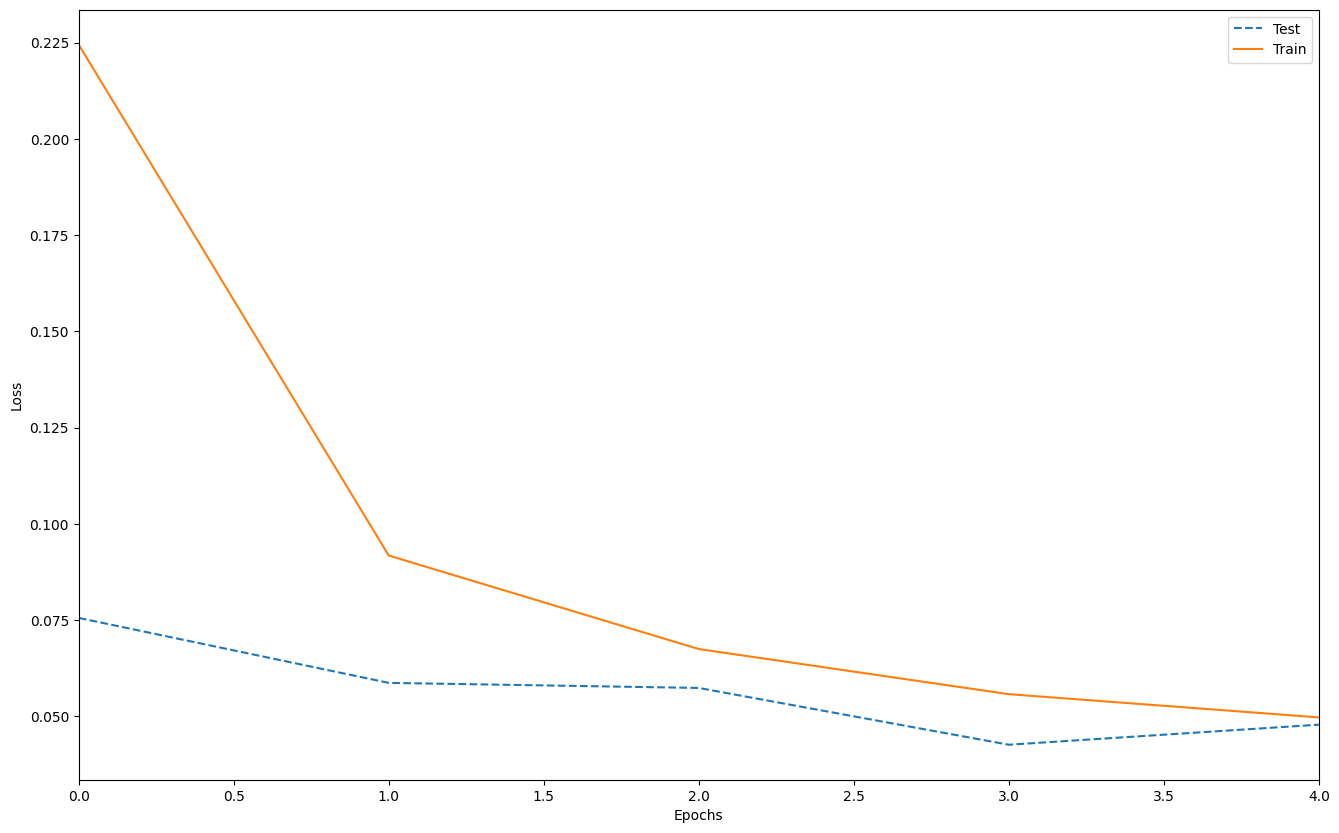

In [9]:
plot_loss(history)